In [1]:
import sys
sys.path.append("../")

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from torch.nn.utils.rnn import pack_padded_sequence
import torchvision as tv
import torch.utils.data as td
from torch.nn import functional as F
from torch import nn
import torch

import models.nntools_modified as nt
import models.framework as fw
import models.framework_varying as fwv
import models.framework_single_varying as fwsv
import utils.config as cfg
from utils.datareader_toy import toyScenesdata

from utils.visualization import *

from PIL import Image
import cv2
# import imageio

cuda
cuda
cuda


In [2]:
net = fwv.MultiAgentNetwork(cfg.FCN_OUT, cfg.NUM_INTENTS, cfg.SCENE_OUT,
                                cfg.INTENT_IN, cfg.INTENT_OUT, cfg.SCORE_IN)

dataset = toyScenesdata(set_name="test", traj_time=cfg.PAST_TRAJECTORY_TIME)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = net.to(device)
test_set = toyScenesdata(set_name="test")
# output_dir = "data/res_gpu_original_downsample_epoch_75_pt_5/" # output_dir = cfg.EXP_NAME
output_dir = cfg.OUTPUT_PATH + cfg.EXP_NAME

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

Read in 1000 
700
200
100
Read in 1000 
700
200
100


In [3]:
def load_state_dict(checkpoint):
    """Loads the experiment from the input checkpoint."""
    net.load_state_dict(checkpoint['Net'])
#     optimizer.load_state_dict(checkpoint['Optimizer'])
    history = checkpoint['History']

    # The following loops are used to fix a bug that was
    # discussed here: https://github.com/pytorch/pytorch/issues/2830
    # (it is supposed to be fixed in recent PyTorch version)
    for state in optimizer.state.values():
        for k, v in state.items():
            if isinstance(v, torch.Tensor):
                state[k] = v.to(net.device)

def load():
    """Loads the experiment from the last checkpoint saved on disk."""
    checkpoint = torch.load(checkpoint_path,
                            map_location=net.device)
    load_state_dict(checkpoint)
#     del checkpoint

In [4]:
# test_loader = td.DataLoader(test_set, batch_size=cfg.BATCH_SIZE, shuffle=cfg.SHUFFLE, drop_last=cfg.DROP_LAST, pin_memory=True)

# Initialize history
history = []

# Define checkpoint paths
# if output_dir is None:
#     output_dir = 'experiment_{}'.format(time.time())
# os.makedirs(output_dir, exist_ok=True)
checkpoint_path = os.path.join(output_dir, "checkpoint.pth.tar")
config_path = os.path.join(output_dir, "config.txt")

# Transfer all local arguments/variables into attributes
# locs = {k: v for k, v in locals().items() if k is not 'self'}
# self.__dict__.update(locs)

# Load checkpoint and check compatibility
# if os.path.isfile(config_path):
#     with open(config_path, 'r') as f:
#         if f.read()[:-1] != repr(self):
#             raise ValueError(
#                 "Cannot create this experiment: "
#                 "I found a checkpoint conflicting with the current setting.")
load()

(480, 640, 3)
Displaying input to the network


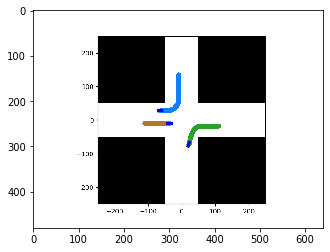

In [5]:
# TODO - replace these with the inputs used for the network
# ls - the entire groundtruth trajectory of the agent
# vs - the entire groundtruth velocities of the agent

# ls, vs -> required for plotting the actual trajectories
# vs additionally required for the initial velocity value
# s_points -> refers to the actual data that is used in init.npy file.
# these are the starting conditions set initially for the image
datapoint = "3/150/"
data_path = cfg.DATA_PATH + datapoint
# print(data_path)
base_path = cfg.ACTUAL_PATH + "/" + datapoint
# print(base_path)
s_points = np.load(base_path + "init.npy", allow_pickle=True)
vs = np.load(base_path + "vs.npy")
ls = np.load(base_path + "ls.npy")
# im = imageio.imread("../data/toydataset/2/2716/scene.png")
im = np.array(cv2.imread(base_path + "scene.png"))
print(im.shape)

print("Displaying input to the network")
fig = plt.figure()
plt.imshow(im)
# plt.savefig("test_input.png")
plt.show()

In [6]:
# sample_img = imageio.imread("../data/toydataset_resampled/2/2716/scene.png")
sample_img = np.array(cv2.imread(data_path + "scene.png"))
sample_ls = np.load(data_path + "ls.npy")
sample_gt = np.array(list(np.array(np.load(data_path + "init.npy", allow_pickle=True))))
print(sample_img.shape, sample_ls.shape, sample_gt.shape)

(100, 100, 3) (3, 24) (3,)


In [7]:
sample_img = torch.from_numpy(sample_img)
sample_img = sample_img.view(1, *sample_img.size())
print(sample_img.shape)
sample_ls = torch.from_numpy(sample_ls)
sample_ls = sample_ls.view(1, *sample_ls.size())
print(sample_ls.shape)
sample_gt = torch.from_numpy(sample_gt)
sample_gt = sample_gt.view(1, *sample_gt.size())
print(sample_gt.shape)
sample_img = sample_img.to(net.device)
sample_ls = sample_ls.to(net.device)
sample_gt = sample_gt.to(net.device)

torch.Size([1, 100, 100, 3])
torch.Size([1, 3, 24])
torch.Size([1, 3])


In [8]:
y, d = net(sample_img, sample_ls, sample_gt)
print(y)
print(d)

s = nn.Softmax(dim=1)
sout = s(y)

tensor([[69.2387, 69.4445, 67.2534, 71.2348, 69.4100, 69.6159, 67.4441, 71.4062,
         67.7194, 67.9442, 65.7177, 69.8012, 71.6525, 71.8598, 69.8158, 73.6499,
         69.7544, 69.9603, 67.8283, 71.7513, 69.9257, 70.1316, 68.0181, 71.9232,
         68.2923, 68.5134, 66.2705, 70.3169, 72.1717, 72.3790, 70.3315, 74.1594,
         70.2897, 70.4956, 68.4227, 72.2895, 70.4611, 70.6669, 68.6078, 72.4617,
         68.8561, 69.0620, 66.8229, 70.8522, 72.7103, 72.9175, 70.8668, 74.6788,
         70.4695, 70.6754, 68.5900, 72.4708, 70.6409, 70.8467, 68.7751, 72.6404,
         69.0356, 69.2418, 67.0331, 71.0320, 72.8913, 73.0951, 71.0465, 74.8658]],
       device='cuda:0', grad_fn=<CopyBackwards>)
tensor(45, device='cuda:0')


../models/framework_varying.py:181: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [9]:
predicted_intents = list()
n_modes = y.shape[1]
n_agents = 0
nm = n_modes
while nm != 1:
    n_agents += 1
    nm = nm // 4
overall_ind = torch.argmax(sout, dim=1)
n_samples = overall_ind.shape[0]
for i in range(n_samples):
    ints = list()
    oin = overall_ind[i]
#     print(oin)
    for k in range(n_agents):
        oin = oin//4**k
        ints.append((oin%4).item())
        print(oin)
#         print("===========")
#         print(ints)
    predicted_intents.append(np.array(ints))
print(predicted_intents)
print(len(predicted_intents))

tensor(63, device='cuda:0')
tensor(15, device='cuda:0')
tensor(0, device='cuda:0')
[array([3, 3, 0])]
1


[3 3 0]
1
3
Displaying Groundtruth complete trajectory
Displaying Predicted complete trajectory
Successful new trajectory was generated


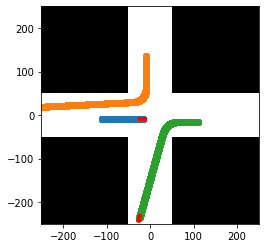

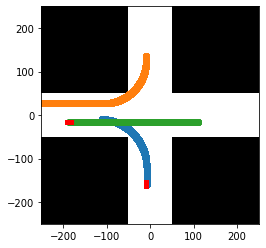

In [10]:
for new_intents in predicted_intents:
    print(new_intents)
    f, f_new, c = visualize(new_intents, s_points, ls, vs)
    # f.savefig("test_old.png")
    # f_new.savefig("test_new.png")
    print("Displaying Groundtruth complete trajectory")
    f.show()
    print("Displaying Predicted complete trajectory")
    f_new.show()
    if c:
        print("Collision occurred for new intents")
    else:
        print("Successful new trajectory was generated")